In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import matplotlib.pyplot as plt

In [3]:
def storeScores(dictionary, sequence, qualities):
    for n,c in enumerate(sequence):
        try:
            dictionary[n].append(qualities[n])
        except:
            dictionary[n] = []
            dictionary[n].append(qualities[n])
    return dictionary
        


In [6]:
#IN_FILE = '../files/NA12878_child_1.fq'
IN_FILE = '../files/smallTest.fq'

qscores = {}
for record in SeqIO.parse(IN_FILE, "fastq"):
    qualities = record.letter_annotations["phred_quality"]
    qscores = storeScores(qscores, record.seq, qualities)

In [7]:
df = pd.DataFrame(qscores)
df.tail()

,0,1,2,3,4
0,34,34,34,37,37
1,26,26,26,26,26
2,32,33,34,35,36


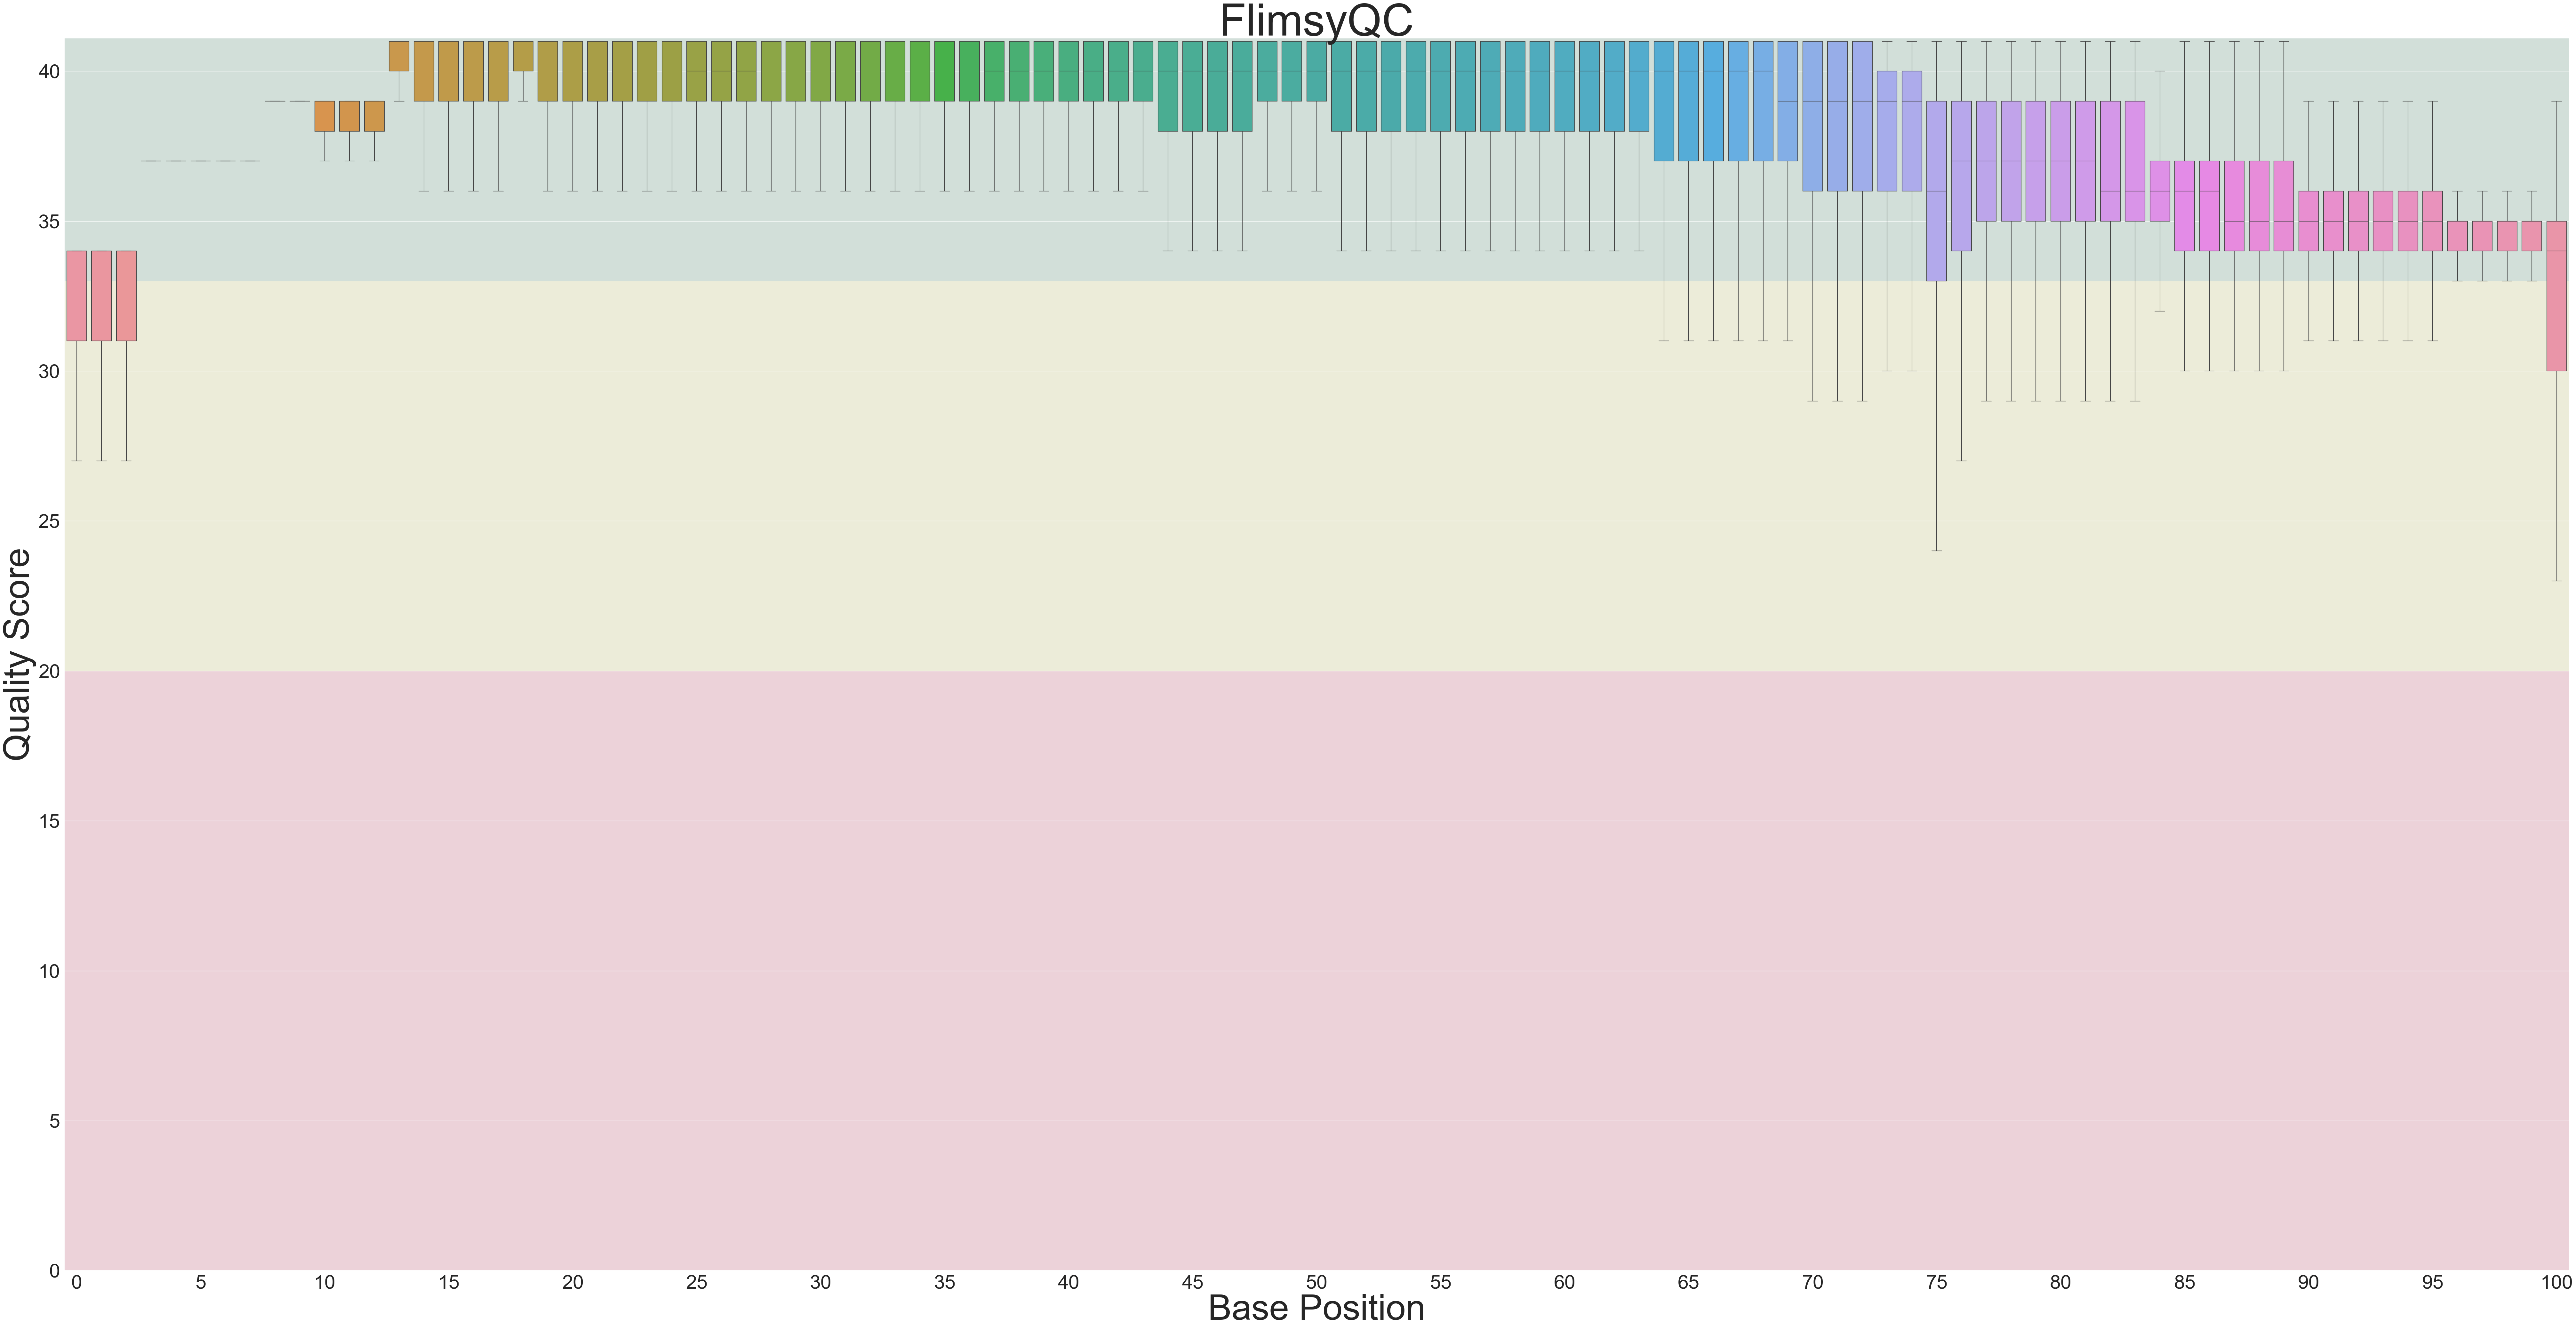

In [28]:
sns.set(font_scale = 4)


plt.figure(figsize=(101,50))
plt.axhspan(0,20, facecolor='red', alpha=.1, zorder = -1)
plt.axhspan(20,33, facecolor='yellow', alpha=.1, zorder = -1)
plt.axhspan(33,41.1, facecolor='green', alpha=.1, zorder = -1)
plot = sns.boxplot(data=df, showfliers = False)
plt.title('FlimsyQC', fontsize=100)
plt.xlabel('Base Position', fontsize=80)
plt.ylabel('Quality Score', fontsize=80)
plot.set_ylim(ymax=41.1,ymin=0)
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

